In [1]:
import numpy as np

#Adams's method 

#functions representing speed
xspeed = lambda x,y: -y/(x**2 + y**2) 
yspeed = lambda x,y: x/(x**2 + y**2)

#user's input
rx0 = 1.
ry0 = 1.
t = 200.
n = 200

#Coords of the point in different moments of the time
xdots = np.zeros((n))
ydots = np.zeros((n))
#Step
h = t/n

#Base position (for both methods)
xdots[0] = rx0
ydots[0] = ry0
xdots[1] = xdots[0] + h*xspeed(xdots[0],ydots[1])
ydots[1] = ydots[0] + h*yspeed(xdots[0],ydots[1]) 


#Calculating new coordinates after a small period of time - t/n, the less is this period, more precise the method is
for i in range(n-2):
    xdots[i+2] = xdots[i+1] + h*((3/2)*xspeed(xdots[i+1],ydots[i+1]) - (1/2)*xspeed(xdots[i],ydots[i]))
    ydots[i+2] = ydots[i+1] + h*((3/2)*yspeed(xdots[i+1],ydots[i+1]) - (1/2)*yspeed(xdots[i],ydots[i]))
#print(xdots,ydots)

In [2]:
#Euler's method

#Coords of the point in different moments of the time
xdots_ = np.zeros((n))
ydots_ = np.zeros((n))

#Base position
xdots_[0] = rx0
ydots_[0] = ry0

for i in range(n-1):
    xdots_[i+1] = xdots_[i] + h*xspeed(xdots_[i],ydots_[i])
    ydots_[i+1] = ydots_[i] + h*yspeed(xdots_[i],ydots_[i])    
#print(xdots_ , ydots_)

In [3]:
#Runge-Kutta 's method

xdots__ = xdots_.copy()
ydots__ = ydots_.copy()

for i in range(n-1):
    xdots__[i+1] = xdots__[i] + h * (xspeed(xdots__[i+1],ydots__[i+1]) + xspeed(xdots__[i],ydots__[i]))/2
    ydots__[i+1] = ydots__[i] + h * (yspeed(xdots__[i+1],ydots__[i+1]) + yspeed(xdots__[i],ydots__[i]))/2

In [4]:
#Runge - Kutta's 3rd approximation method
def runge_kutta3(f, x, y0):
    print(x)
    h1 = x[1] - x[0]
    print(h)
    y = np.empty_like(x)
    y[0] = y0
    print(y[0])
    for i in range(1, len(x)):
        k1 = h1 * f(x[i - 1], y[i - 1])
        k2 = h1 * f(x[i - 1] + h1/3, y[i - 1] + k1/3)
        k3 = h1 * f(x[i - 1] + 2*h1/3, y[i - 1] + 2*k2/3)
        y[i] = y[i - 1] + (k1 + 3*k3) / 4
        #print(y[i])
    return y

[ 1.          0.5        -0.1        -0.6862069  -1.19949064 -1.60873236
 -1.8998923  -2.07006387 -2.12375065 -2.07034355 -1.92233041 -1.69399167
 -1.40043752 -1.0568952  -0.67818445 -0.27833777  0.12966677  0.53408431
  0.9245124   1.29194524  1.62878504  1.9288197   2.18717484  2.40024638
  2.56561886  2.68197387  2.74899196  2.767251    2.73812332  2.66367343
  2.54655796  2.38992893  2.19734137  1.97266588  1.72000676  1.44362601
  1.14787344  0.83712295  0.5157151   0.18790576 -0.14217919 -0.47058325
 -0.79355324 -1.10756767 -1.4093602  -1.69593824 -1.96459707 -2.21292989
 -2.43883393 -2.64051315 -2.8164777  -2.96554047 -3.08681115 -3.17968797
 -3.24384735 -3.27923197 -3.28603724 -3.26469661 -3.21586583 -3.14040642
 -3.03936859 -2.91397368 -2.76559644 -2.59574714 -2.40605385 -2.19824478
 -1.97413104 -1.73558972 -1.48454755 -1.22296509 -0.95282159 -0.67610051
 -0.39477592 -0.11079957  0.17391114  0.45748433  0.73810397  1.0140193
  1.28355338  1.54511074  1.79718415  2.03836056  2.

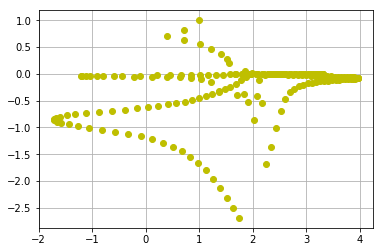

In [7]:
xdots4 = xdots_.copy()
ydots4 = ydots_.copy()
#print(xdots4, ydots4)
xdots4 = runge_kutta3(yspeed, xdots4, ydots4[0]).copy()
ydots4 = runge_kutta3(xspeed, ydots4, xdots4[0]).copy()
#print(xdots4, ydots4)
import matplotlib.pyplot as plt4
plt4.plot(xdots4, ydots4, 'yo')
plt4.grid()
plt4.show()

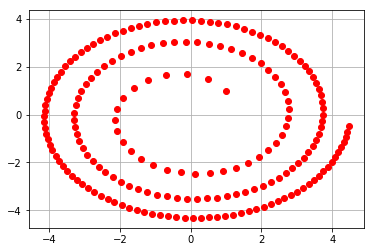

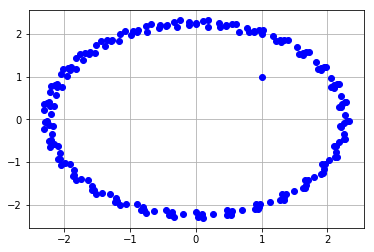

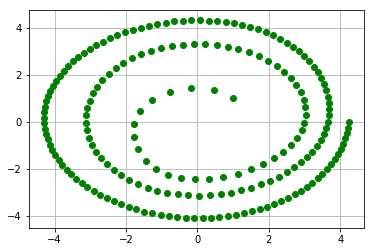

In [6]:
#building a trace of the point's movement
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
plt1.plot(xdots_, ydots_, 'ro')
plt1.grid()
plt1.show()
plt2.plot(xdots, ydots, 'bo')
plt2.grid()
plt2.show()
plt3.plot(xdots__,ydots__, 'go')
plt3.grid()
plt3.show()